In [10]:
# import pysam
# from pysam import VariantFile as vcf
import operator
from math import log2
import pandas as pd
from pandas import DataFrame as dataframe
import matplotlib.pyplot as plt
import numpy as np
from scipy.spatial.distance import pdist, squareform
import scipy
import  os
import os.path
import matplotlib.colors as mcolors
from scipy import stats
from statsmodels.stats.multitest import multipletests

In [11]:
#chr1_xba
less_95_xs_chr1_xba=[]
less_95_ys_chr1_xba=[]
from_95_to_99_xs_chr1_xba=[]
from_95_to_99_ys_chr1_xba=[]
from_99_to_999_xs_chr1_xba=[]
from_99_to_999_ys_chr1_xba=[]
larger_than_999_xs_chr1_xba=[]
larger_than_999_ys_chr1_xba=[]
#chr1_xbb
less_95_xs_chr1_xbb=[]
less_95_ys_chr1_xbb=[]
from_95_to_99_xs_chr1_xbb=[]
from_95_to_99_ys_chr1_xbb=[]
from_99_to_999_xs_chr1_xbb=[]
from_99_to_999_ys_chr1_xbb=[]
larger_than_999_xs_chr1_xbb=[]
larger_than_999_ys_chr1_xbb=[]

In [12]:
def getmaxindices(allp,num):
    # 先获取列表中前100个最大的值及其索引
    max_values_and_indices = sorted(enumerate(allp), key=lambda x: x[1],reverse=True)[:num]

    # 再从这100个最大值中提取出索引
    max_indices = [index for index, value in max_values_and_indices]
    return max_indices

In [15]:
!ln -s /data2/wangxuedong/mhc_test_data/similar_region_csvfiles/pos_prob_split_chr1_xbb.csv ../csvfiles/pos_prob_split_chr1_xbb.csv
!ln -s /data2/wangxuedong/mhc_test_data/similar_region_csvfiles/pos_prob_split_chr1_xba.csv ../csvfiles/pos_prob_split_chr1_xba.csv


ln: failed to create symbolic link '../csvfiles/pos_prob_split_chr1_xbb.csv': File exists


In [16]:
#chr1_xba
#[121579777, 123992934]
df_mhc_pos_path=pd.read_csv("../csvfiles/pos_prob_split_chr1_xba.csv")
positions4=df_mhc_pos_path[(df_mhc_pos_path["Unnamed: 0"]>=121579777)&(df_mhc_pos_path["Unnamed: 0"]<=123992934)]["Unnamed: 0"].to_list()
Ps4=df_mhc_pos_path[(df_mhc_pos_path["Unnamed: 0"]>=121579777)&(df_mhc_pos_path["Unnamed: 0"]<=123992934)]["P"].to_list()
midpvalue=[]
mean_arr=-0.017462454026226405
std_arr=0.006996042091888453
for prob in Ps4:
    mid_res=stats.norm.cdf(prob, mean_arr, std_arr)
    midpvalue.append(mid_res)
pvalue = multipletests(midpvalue, method='fdr_bh')[1]
for i in range(len(pvalue)):
    
    if pvalue[i]<=0.95:
        # arr_less_than_95.append(i)
        less_95_xs_chr1_xba.append(positions4[i])
        less_95_ys_chr1_xba.append(Ps4[i])
    elif pvalue[i]>0.95 and pvalue[i]<=0.99:
        from_95_to_99_xs_chr1_xba.append(positions4[i])
        from_95_to_99_ys_chr1_xba.append(Ps4[i])
    elif pvalue[i]>0.99 and pvalue[i]<=0.999:
        #arr_99_to_999.append(i)
        from_99_to_999_xs_chr1_xba.append(positions4[i])
        from_99_to_999_ys_chr1_xba.append(Ps4[i])
    elif pvalue[i]>0.999:
        #arr_larger_than_999.append(i)
        larger_than_999_xs_chr1_xba.append(positions4[i])
        larger_than_999_ys_chr1_xba.append(Ps4[i])


In [17]:
#chr1_xbb
#[123992935, 124938490]
df_mhc_pos_path=pd.read_csv("../csvfiles/pos_prob_split_chr1_xbb.csv")
positions5=df_mhc_pos_path[(df_mhc_pos_path["Unnamed: 0"]>=123992935)&(df_mhc_pos_path["Unnamed: 0"]<=124938490)]["Unnamed: 0"].to_list()
Ps5=df_mhc_pos_path[(df_mhc_pos_path["Unnamed: 0"]>=123992935)&(df_mhc_pos_path["Unnamed: 0"]<=124938490)]["P"].to_list()
midpvalue=[]
mean_arr=-0.017462454026226405
std_arr=0.006996042091888453
for prob in Ps5:
    mid_res=stats.norm.cdf(prob, mean_arr, std_arr)
    midpvalue.append(mid_res)
pvalue = multipletests(midpvalue, method='fdr_bh')[1]
for i in range(len(pvalue)):
    
    if pvalue[i]<=0.95:
        # arr_less_than_95.append(i)
        less_95_xs_chr1_xbb.append(positions5[i])
        less_95_ys_chr1_xbb.append(Ps5[i])
    elif pvalue[i]>0.95 and pvalue[i]<=0.99:
        from_95_to_99_xs_chr1_xbb.append(positions5[i])
        from_95_to_99_ys_chr1_xbb.append(Ps5[i])
    elif pvalue[i]>0.99 and pvalue[i]<=0.999:
        #arr_99_to_999.append(i)
        from_99_to_999_xs_chr1_xbb.append(positions5[i])
        from_99_to_999_ys_chr1_xbb.append(Ps5[i])
    elif pvalue[i]>0.999:
        #arr_larger_than_999.append(i)
        larger_than_999_xs_chr1_xbb.append(positions5[i])
        larger_than_999_ys_chr1_xbb.append(Ps5[i])


In [18]:

zipped_color_list={'ACB': [0.6199018140222545, 0.8273394036727978, 0.07681613835781242],
 'ASW': [0.5231784384407372, 0.5355615576319177, 0.6085573417584578],
 'All': [0.7478976414894968, 0.8581108654424285, 0.8152857852705114],
 'BEB': [0.7702098515876681, 0.34699071947424787, 0.387557687328841],
 'CDX': [0.9944848698557753, 0.4319680883089101, 0.6095703728222707],
 'CEU': [0.22146321845482853, 0.31820344771967357, 0.7921193188659656],
 'CHB': [0.09339120026575065, 0.49739737967690656, 0.9879237745701328],
 'CHS': [0.8750564664998141, 0.7338069529165195, 0.3058546593690403],
 'CLM': [0.737704221385458, 0.9209172916347589, 0.6000025255900048],
 'ESN': [0.03209678227783541, 0.8030222283085109, 0.30596638618321637],
 'FIN': [0.8623378159467614, 0.2079200577555228, 0.008672028349016814],
 'GBR': [0.4251541312392182, 0.3490460463116365, 0.8786460080999065],
 'GIH': [0.7525268826984933, 0.5333121198983907, 0.538554551310322],
 'GWD': [0.2627011188835271, 0.92851968237643, 0.4864089750510442],
 'IBS': [0.25115312032131665, 0.5397035754901451, 0.13380587437193459],
 'ITU': [0.9450480442890117, 0.5394575598574127, 0.8623826849068229],
 'JPT': [0.21405238204705113, 0.540757391337697, 0.08806809839137131],
 'KHV': [0.22561371426433752, 0.9164305579097723, 0.7907538310971419],
 'LWK': [0.20274923299053582, 0.4890267202072731, 0.8462139375324359],
 'MSL': [0.9951137970829559, 0.7005950908445686, 0.4989189517572168],
 'MXL': [0.3259201021356801, 0.8130093336742588, 0.9240844242162518],
 'PEL': [0.9871886206772149, 0.5709065709740972, 0.6773178323861238],
 'PJL': [0.6308240514007377, 0.7852668712542968, 0.7819736701998831],
 'PUR': [0.26909568610792434, 0.31557713998302317, 0.4779229844775781],
 'STU': [0.758551169090893, 0.8611540303381624, 0.3997187576590727],
 'TSI': [0.7384421240805822, 0.37820822943132903, 0.9005885384692488],
 'YRI': [0.42363231438946425, 0.7813235433022089, 0.8635294700674911]}


less_95 = zipped_color_list['YRI']
from_95_to_99 = zipped_color_list['TSI']
from_99_to_999 = zipped_color_list['CDX']
larger_than_999 = zipped_color_list['MSL']

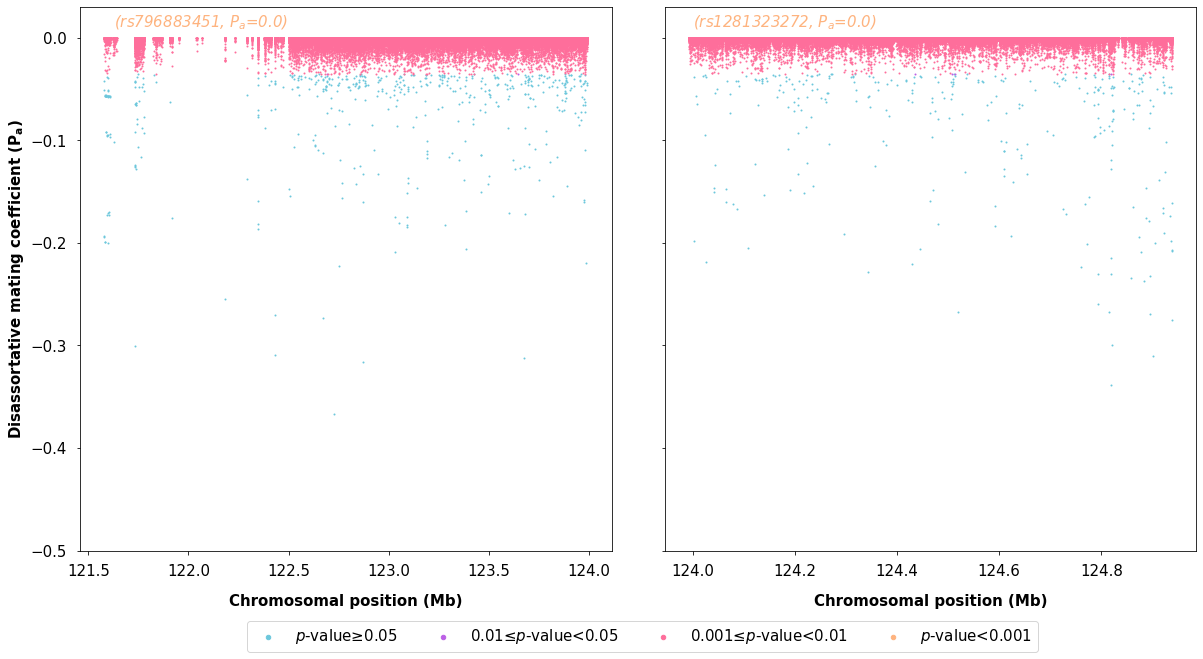

In [25]:
import matplotlib.pyplot as plt
plt.rcParams['font.size'] = 15
plt.rcParams['grid.linewidth'] = 1.2
plt.rcParams['mathtext.default'] = 'regular'
fig, axes = plt.subplots(nrows=1, ncols=2, sharey=True, figsize=(20, 10), facecolor='white')


axes[0].scatter(np.array(less_95_xs_chr1_xba)/ 1000000, less_95_ys_chr1_xba, color=less_95, s=1, label="$\mathit{p}$-value≥0.05")
axes[0].scatter(np.array(from_95_to_99_xs_chr1_xba)/ 1000000, from_95_to_99_ys_chr1_xba, color=from_95_to_99, s=1, label="0.01≤$\mathit{p}$-value<0.05")
axes[0].scatter(np.array(from_99_to_999_xs_chr1_xba)/ 1000000, from_99_to_999_ys_chr1_xba, color=from_99_to_999, s=1, label="0.001≤$\mathit{p}$-value<0.01")
axes[0].scatter(np.array(larger_than_999_xs_chr1_xba)/ 1000000, larger_than_999_ys_chr1_xba, color=larger_than_999, s=1, label="$\mathit{p}$-value<0.001")
# axes[0].legend(loc="best")


index2 = getmaxindices(Ps4, 1)[0]
x_max_pos = positions4[index2]/1000000
y_max = Ps4[index2]
y_max = float(format(y_max, '.5f'))
axes[0].text(x_max_pos , y_max+0.01,  f'(rs796883451, {r"$P_a$"}={y_max})', color=larger_than_999,fontsize=15, style='italic')

axes[1].scatter(np.array(less_95_xs_chr1_xbb)/ 1000000, less_95_ys_chr1_xbb, color=less_95, s=1,label="$\mathit{p}$-value≥0.05")
axes[1].scatter(np.array(from_95_to_99_xs_chr1_xbb)/ 1000000, from_95_to_99_ys_chr1_xbb, color=from_95_to_99, s=1,label="0.01≤$\mathit{p}$-value<0.05")
axes[1].scatter(np.array(from_99_to_999_xs_chr1_xbb)/ 1000000, from_99_to_999_ys_chr1_xbb, color=from_99_to_999, s=1,label="0.001≤$\mathit{p}$-value<0.01")
axes[1].scatter(np.array(larger_than_999_xs_chr1_xbb)/ 1000000, larger_than_999_ys_chr1_xbb, color=larger_than_999, s=1,label="$\mathit{p}$-value<0.001")
legend = axes[1].legend(loc="lower left", bbox_to_anchor=(-0.8, -0.2),ncol=4)
for lh in legend.legendHandles: 
    lh.set_alpha(1)
    lh._sizes = [20] 


index2 = getmaxindices(Ps5, 1)[0]
x_max_pos = positions5[index2]/1000000
y_max = Ps5[index2]
y_max = float(format(y_max, '.5f'))
axes[1].text(x_max_pos, y_max+0.01, f'(rs1281323272, {r"$P_a$"}={y_max})', color=larger_than_999,fontsize=15, style='italic')

max_y = 0.03
axes[0].set_ylim(-0.5, max_y)
# yticks = np.linspace(-0.25, max_y, num=5)
# axes[0].set_yticks(yticks)


for ax in axes.flatten():
    ax.tick_params(axis='both', which='major', labelsize=15, pad=10)


axes[0].set_xlabel("Chromosomal position (Mb)",fontsize=15, weight = 'bold',labelpad=15)
axes[0].set_ylabel(r"Disassortative mating coefficient ($P_a$)",fontsize=15, weight = 'bold')
axes[1].set_xlabel("Chromosomal position (Mb)",fontsize=15, weight = 'bold',labelpad=15)
# fig.suptitle('Positive-assortative mating non-MHC region', fontsize=30, y=1)

plt.subplots_adjust(wspace=0.1, hspace=0.3)
plt.savefig("pic1_part2.pdf",dpi=600, bbox_inches='tight')
plt.show()
# plt.savefig("pic1_mhc_part1.pdf")